# Convergence plot. Minimal BMN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
# plt.rc("text", usetex=True)
plt.style.use("../figures/paper.mplstyle")

## Read data from disk

* If the data is in `HDF5` format save in a `.h5` file, use the following code

In [2]:
# parameters
def read_data(
    optimizer: str,
    p: dict,
):
    """Read the VQE convergence data for the mini BMN model from disk

    Args:
        optimizer (str): The optimizer used.
        p (dict): The dictionary with the parameters for the filename.
    Returns:
        pandas.DataFrame: The dataframe collecting the results of the convergence
    """
    filename = f"{p['f']}/miniBMN_l{p['l']}_convergence_{optimizer}_{p['v']}_depth{p['d']}_reps{p['n']}_max{p['m']}.h5"
    try:
        df = pd.read_hdf(filename, "vqe")
    except FileNotFoundError as e:
        print(f"{filename} not found. {e}")
        sys.exit()
    return df

* If the data is in `pickle` format saved and compressed in a `.gz` file.,use the following code

In [3]:
# parameters
def read_data_pickle(
    optimizer: str,
    p: dict,
):
    """Read the VQE convergence data for the mini BMN model from disk

    Args:
        optimizer (str): The optimizer used.
        p (dict): The dictionary with the parameters for the filename.
    Returns:
        pandas.DataFrame: The dataframe collecting the results of the convergence
    """
    filename = f"{p['f']}/miniBMN_l{p['l']}_convergence_{optimizer}_{p['v']}_depth{p['d']}_reps{p['n']}_max{p['m']}.gz"
    try:
        df = pd.read_pickle(filename)
    except FileNotFoundError as e:
        print(f"{filename} not found. {e}")
        sys.exit()
    return df

In [10]:
def collect_data(
    optimizers: list,
    p: dict,
    h5: bool = True,
):
    """Read the VQE convergence data for the mini BMN model from disk
    Args:
        optimizer (str): The optimizer used.
        p (dict): The dictionary with the parameters for the filename.
        h5 (bool, optional): if the file to collect data from are in HDF5 format. Defaults to true
    Returns:
        pandas.DataFrame: The dataframe collecting the all the results of the convergence
    """
    # concatenate the results from all files
    frames = [read_data(o, p) for o in optimizers]
    return pd.concat(frames, keys=optimizers, names=["Optimizer"])


Parameters

In [11]:
depth = 3
g2N = 0.2
varform = ['ry','rz']
nrep = 10
maxit = 10000
datafolder = "../data"

In [12]:
params = dict()
params["l"] = str(g2N).replace(".", "")
params["d"] = depth
params["v"] = "-".join(varform)
params["m"] = maxit
params["n"] = nrep
params["f"] = datafolder

In [11]:
df = read_data("L-BFGS-B",params)

In [ ]:
df.plot.scatter(x='counts',y='energy',marker='.')

Collect multiple data in one frame

In [13]:
opt_label = ["COBYLA", "L-BFGS-B","SLSQP","NELDER-MEAD"]
result = collect_data(opt_label,params)

In [10]:
# for o in opt_label:
#     result.loc[o].plot.scatter(x='counts',y='energy',marker=".",label=o)

## Get stats

In [14]:
result.groupby('Optimizer').apply(min).energy

Optimizer
COBYLA         0.103518
L-BFGS-B       0.150000
SLSQP          0.150000
NELDER-MEAD    0.158079
Name: energy, dtype: float64

In [15]:
gs = dict()
for r in opt_label:
    gs[r] = result.loc[r].groupby('rep').apply(min).energy
gsdf = pd.DataFrame.from_dict(gs, dtype=float)

In [16]:
gsdf

,COBYLA,L-BFGS-B,SLSQP,NELDER-MEAD
rep,,,,
0,0.150000,0.15,0.150002,0.167716
1,0.150000,0.15,0.150000,0.195052
2,0.103518,0.15,0.150000,0.158079
3,0.125041,0.15,0.150001,0.160812
4,0.150039,0.15,0.150000,0.178088
5,0.150028,0.15,0.150000,0.192677
6,0.150011,0.15,0.150001,0.196315
7,0.150021,0.15,0.150002,0.171184
8,0.150000,0.15,0.150000,0.178210


In [17]:
gsdf.describe().T[["min","max","mean","std"]]

,min,max,mean,std
COBYLA,0.103518,0.150039,0.142866,1.589757e-02
L-BFGS-B,0.150000,0.150000,0.150000,1.229676e-08
SLSQP,0.150000,0.150002,0.150001,6.054314e-07
NELDER-MEAD,0.158079,0.196315,0.177746,1.369224e-02


## Plot convergence

In [142]:
ht = 0.00328726

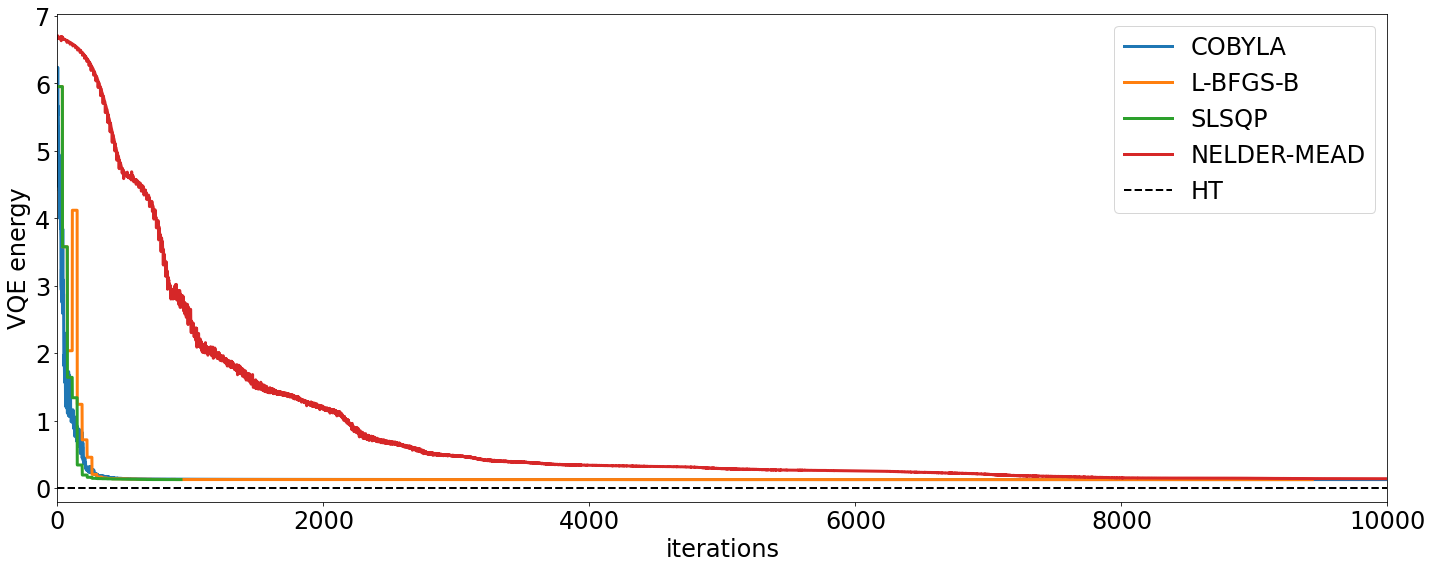

In [148]:
# select the best runs for each optimizer
fig, ax = plt.subplots(figsize=(20,8))
for o in opt_label:
    result.loc[o,gsdf[o].idxmin()].plot(x='counts',y='energy', xlim=[0,10000],label=o, ax=ax)
ax.axhline(ht,c="k",ls="--", lw="2",label="HT")
ax.set_xlabel("iterations")
ax.set_ylabel("VQE energy")
ax.legend(loc="upper right")
filename = f"../figures/miniBMN_l{params['l']}_convergence_{params['v']}_depth{params['d']}_nr{params['n']}_max{params['m']}"
plt.savefig(f"{filename}.pdf")
plt.savefig(f"{filename}.png")
plt.savefig(f"{filename}.svg")


Zoom in

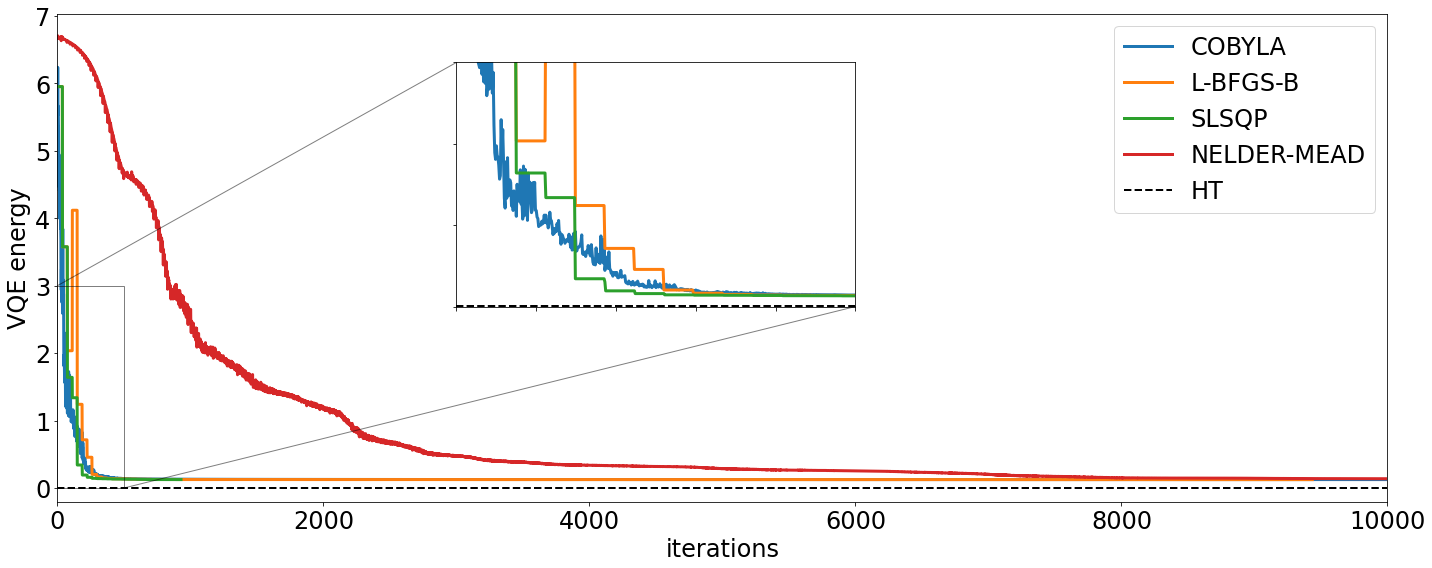

In [147]:
# select the best runs for each optimizer
fig, ax = plt.subplots(figsize=(20,8))
for o in opt_label:
    result.loc[o,gsdf[o].idxmin()].plot(x='counts',y='energy', xlim=[0,10000],label=o, ax=ax)
ax.axhline(ht,c="k",ls="--", lw="2",label="HT")

# inset axes.... bounds are [x0, y0, width, height] for where to put it
axins = ax.inset_axes([0.3, 0.4, 0.3, 0.5])

for o in opt_label:
    result.loc[o,gsdf[o].idxmin()].plot(x='counts',y='energy', xlim=[0,500], legend=False, ax=axins)
axins.axhline(ht,c="k",ls="--", lw="2")
# sub region of the original image
x1, x2, y1, y2 = 0, 500, 0, 3
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.set_ylabel('')
axins.set_xlabel('')

ax.indicate_inset_zoom(axins, edgecolor="black")

ax.set_xlabel("iterations")
ax.set_ylabel("VQE energy")
ax.legend(loc="upper right")
filename = f"../figures/miniBMN_l{params['l']}_convergence_{params['v']}_depth{params['d']}_nr{params['n']}_max{params['m']}_zoom"
plt.savefig(f"{filename}.pdf")
plt.savefig(f"{filename}.png")
plt.savefig(f"{filename}.svg")

# Results from different depths

In [18]:
depths = [1,2,3,4,5,6,7,8,9,10]
opts = ["COBYLA","L-BFGS-B","SLSQP"]

In [20]:
for d in depths:
    params['d'] = d
    print(f"Depth={params['d']} ---------------------")
    res = collect_data(opts,params)
    gs = dict()
    for r in opts:
        gs[r] = res.loc[r].groupby('rep').apply(min).energy
    gsdf = pd.DataFrame.from_dict(gs, dtype=float)
    print(gsdf.describe().T[["min","max","mean","std"]])
    

Depth=1 ---------------------
           min   max  mean           std
COBYLA    0.15  0.15  0.15  7.529873e-10
L-BFGS-B  0.15  0.15  0.15  6.290314e-11
SLSQP     0.15  0.15  0.15  1.279973e-07
Depth=2 ---------------------
               min       max      mean           std
COBYLA    0.149748  0.150001  0.149975  7.990383e-05
L-BFGS-B  0.150000  0.150000  0.150000  2.003758e-10
SLSQP     0.150000  0.150001  0.150000  2.035404e-07
Depth=3 ---------------------
               min       max      mean           std
COBYLA    0.103518  0.150039  0.142866  1.589757e-02
L-BFGS-B  0.150000  0.150000  0.150000  1.229676e-08
SLSQP     0.150000  0.150002  0.150001  6.054314e-07
Depth=4 ---------------------
               min       max      mean       std
COBYLA    0.101246  0.150163  0.125529  0.015867
L-BFGS-B  0.149484  0.150000  0.149869  0.000192
SLSQP     0.149972  0.150019  0.149998  0.000012
Depth=5 ---------------------
               min       max      mean       std
COBYLA    0.09215

In [21]:
ds = dict()
for d in depths:
    params['d'] = d
    res = collect_data(opts,params)
    ds[d] = res.groupby('Optimizer').apply(min).energy

In [22]:
dfds = pd.DataFrame.from_dict(ds,orient='index',dtype=float).rename_axis("depth")
dfds

,COBYLA,L-BFGS-B,SLSQP
depth,,,
1,0.150000,0.150000,0.150000
2,0.149748,0.150000,0.150000
3,0.103518,0.150000,0.150000
4,0.101246,0.149484,0.149972
5,0.092156,0.100091,0.076746
6,0.079161,0.076442,0.072089
7,0.078458,0.075896,0.072952
8,0.094043,0.075934,0.071741
9,0.091046,0.067497,0.024463


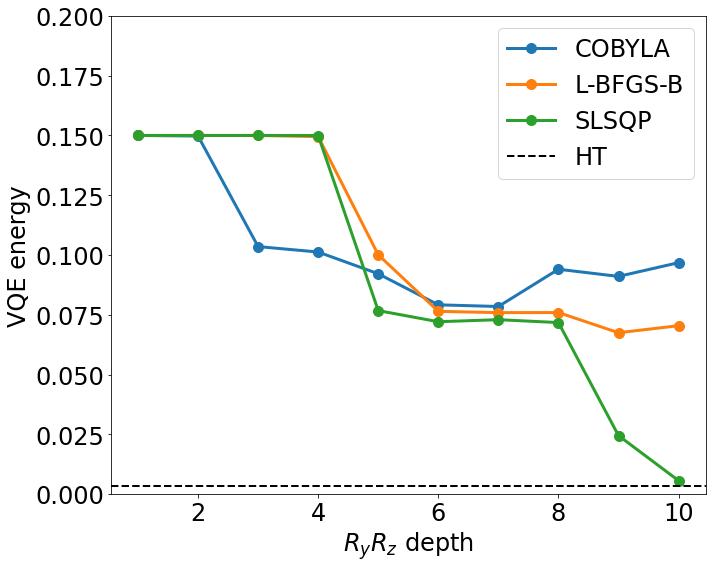

In [23]:
ht = 0.00328726
fig, ax = plt.subplots()
dfds.plot(marker="o", ylim=[0,0.2], ax=ax)
ax.axhline(ht,c="k",ls="--",lw="2",label="HT")
ax.set_ylabel("VQE energy")
ax.set_xlabel(r"$R_yR_z$"+" depth")
ax.legend(loc="upper right")
plt.savefig("../figures/miniBMN_l02_ry-rz_nr10_max10000_depths.pdf")
plt.savefig("../figures/miniBMN_l02_ry-rz_nr10_max10000_depths.png")
plt.savefig("../figures/miniBMN_l02_ry-rz_nr10_max10000_depths.svg")

# Convergence plot. Bosonic BMN

## Get data

In [45]:
def read_data_bos(
    optimizer: str,
    p: dict,
):
    """Read the VQE convergence data for the mini BMN model from disk

    Args:
        optimizer (str): The optimizer used.
        p (dict): The dictionary with the parameters for the filename.
    Returns:
        pandas.DataFrame: The dataframe collecting the results of the convergence
    """
    filename = f"{p['f']}_l{p['l']}_convergence_{optimizer}_{p['v']}_depth{p['d']}_reps{p['n']}_max{p['m']}.h5"
    try:
        df = pd.read_hdf(filename, "vqe")
    except FileNotFoundError as e:
        print(f"{filename} not found. {e}")
        sys.exit()
    return df


def read_data_bos_pickle(
    optimizer: str,
    p: dict,
):
    """Read the VQE convergence data for the mini BMN model from disk

    Args:
        optimizer (str): The optimizer used.
        p (dict): The dictionary with the parameters for the filename.
    Returns:
        pandas.DataFrame: The dataframe collecting the results of the convergence
    """
    filename = f"{p['f']}_l{p['l']}_convergence_{optimizer}_{p['v']}_depth{p['d']}_reps{p['n']}_max{p['m']}.gz"
    try:
        df = pd.read_pickle(filename)
    except FileNotFoundError as e:
        print(f"{filename} not found. {e}")
        sys.exit()
    return df


def collect_data_bos(
    optimizers: list,
    p: dict,
    h5: bool = True
):
    """Read the VQE convergence data for the mini BMN model from disk
    Args:
        optimizer (str): The optimizer used.
        p (dict): The dictionary with the parameters for the filename.
        hf (bool, optional): if the data files are HDF5. Defaults to True.
    Returns:
        pandas.DataFrame: The dataframe collecting the all the results of the convergence
    """
    # concatenate the results from all files
    if h5:
        frames = [read_data_bos(o, p) for o in optimizers]
    else:
        frames = [read_data_bos_pickle(o, p) for o in optimizers]
    return pd.concat(frames, keys=optimizers, names=["Optimizer"])


In [46]:
depth = 1
g2N = 0.2
varform = ['ry']
nrep = 100
maxit = 10000
dataprefix = "../data/bosBMN_L2"

In [47]:
params = dict()
params["l"] = str(g2N).replace(".", "")
params["d"] = depth
params["v"] = "-".join(varform)
params["m"] = maxit
params["n"] = nrep
params["f"] = dataprefix

In [49]:
opt_label = ["COBYLA"]#,"L-BFGS-B","SLSQP"]#,"NELDER-MEAD"]
result = collect_data_bos(opt_label,params,False)

Minimum energy

In [50]:
result.groupby('Optimizer').apply(min)

,counts,energy
Optimizer,,
COBYLA,1.0,3.15


Get stats

In [7]:
gs = dict()
for r in opt_label:
    gs[r] = result.loc[r].groupby('rep').apply(min).energy
gsdf = pd.DataFrame.from_dict(gs, dtype=float)

In [8]:
gsdf.describe().T[["min","max","mean","std"]]

,min,max,mean,std
COBYLA,3.549323,3.551532,3.550814,0.000800
L-BFGS-B,3.547251,3.551331,3.548512,0.001393
SLSQP,3.547277,3.551318,3.549520,0.001141


## Plot convergence

In [96]:
ht = 3.13406

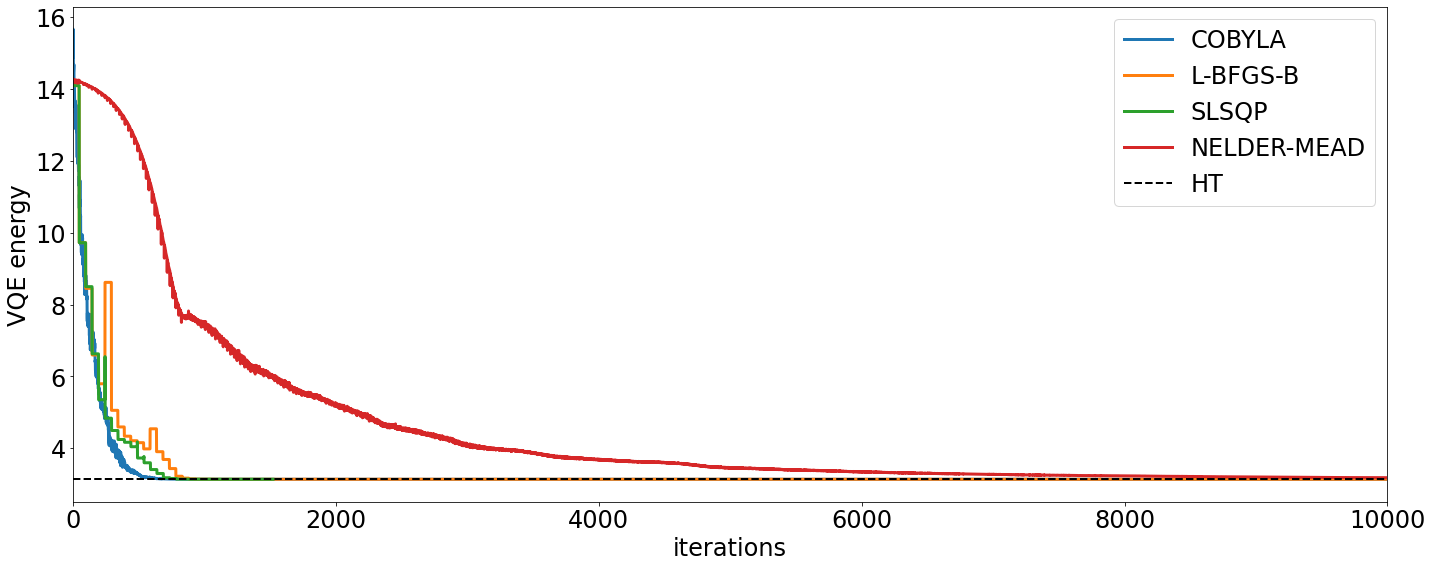

In [98]:
# select the best runs for each optimizer
fig, ax = plt.subplots(figsize=(20,8))
for o in opt_label:
    result.loc[o,gsdf[o].idxmin()].plot(x='counts',y='energy', xlim=[0,10000],label=o, ax=ax)
ax.axhline(ht,c="k",ls="--", lw="2",label="HT")
ax.set_xlabel("iterations")
ax.set_ylabel("VQE energy")
ax.legend(loc="upper right")
# filename = f"../figures/miniBMN_l{params['l']}_convergence_{params['v']}_depth{params['d']}_nr{params['n']}_max{params['m']}"
# plt.savefig(f"{filename}.pdf")
# plt.savefig(f"{filename}.png")

Zoom in

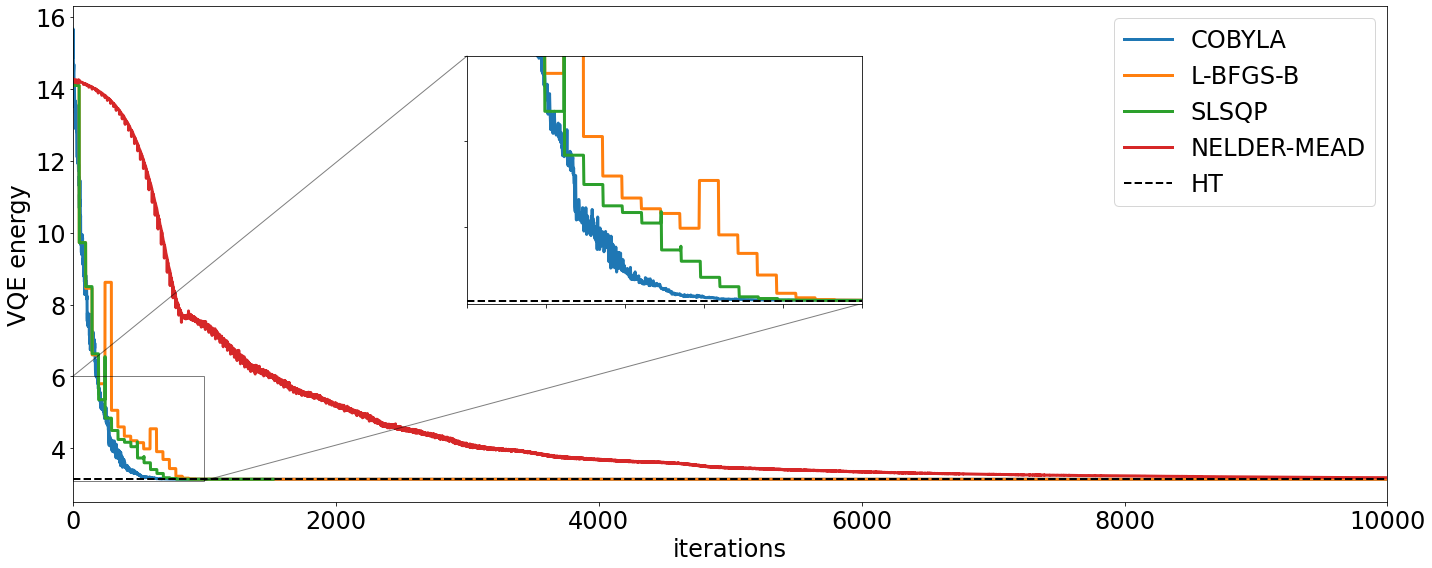

In [101]:
# select the best runs for each optimizer
fig, ax = plt.subplots(figsize=(20,8))
for o in opt_label:
    result.loc[o,gsdf[o].idxmin()].plot(x='counts',y='energy', xlim=[0,10000],label=o, ax=ax)
ax.axhline(ht,c="k",ls="--", lw="2",label="HT")

# inset axes.... bounds are [x0, y0, width, height] for where to put it
axins = ax.inset_axes([0.3, 0.4, 0.3, 0.5])

for o in opt_label:
    result.loc[o,gsdf[o].idxmin()].plot(x='counts',y='energy', xlim=[0,1000], legend=False, ax=axins)
axins.axhline(ht,c="k",ls="--", lw="2")
# sub region of the original image
x1, x2, y1, y2 = 0, 1000, 3.1, 6
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.set_ylabel('')
axins.set_xlabel('')

ax.indicate_inset_zoom(axins, edgecolor="black")

ax.set_xlabel("iterations")
ax.set_ylabel("VQE energy")
ax.legend(loc="upper right")
figprefix = dataprefix.replace("data","figures")
filename = f"{figprefix}_l{params['l']}_convergence_{params['v']}_depth{params['d']}_nr{params['n']}_max{params['m']}_zoom"
plt.savefig(f"{filename}.pdf")
plt.savefig(f"{filename}.png")
plt.savefig(f"{filename}.svg")

# Many couplings plots

## Get data from CSV

In [28]:
#df = pd.read_csv("../data/bosBMN_L2_couplings_ry_depth3_reps10.csv", index_col='l', dtype=float)
df = pd.read_csv("../data/bosBMN_L4_couplings_ry_depth3_reps10.csv", index_col='l', dtype=float)
df

,HT,COBYLA,L-BFGS-B,SLSQP
l,,,,
0.5,3.298944,3.309753,3.309750,3.309749
1.0,3.526254,3.549323,3.547251,3.547277
2.0,3.895478,3.939531,3.935035,3.937296


In [29]:
df = df.assign(COBYLA_HT=df['COBYLA']-df['HT'])
df = df.assign(L_BFGS_B_HT=df['L-BFGS-B']-df['HT'])
df = df.assign(SLSQP_HT=df['SLSQP']-df['HT'])

Text(0.5, 0, '$\\lambda$')

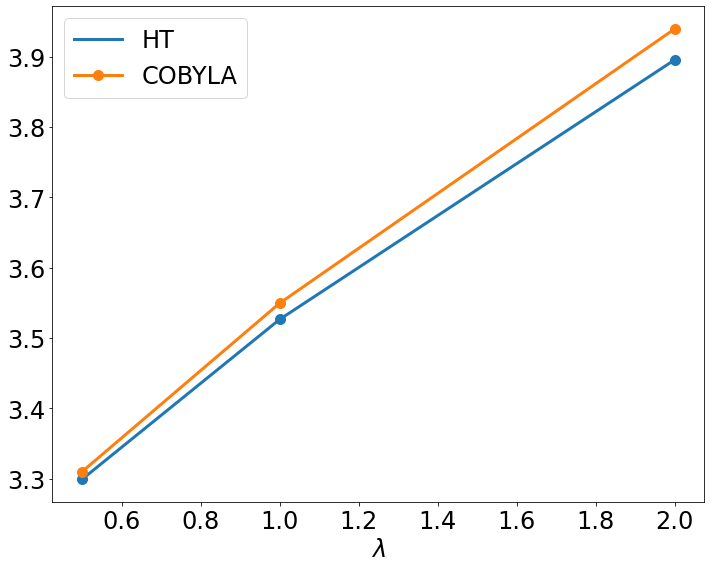

In [30]:
fig, ax = plt.subplots()
df.plot(y='HT', marker='o', ax=ax)
df.plot(y='COBYLA', marker='o', ax=ax)
ax.set_xlabel(r"$\lambda$")

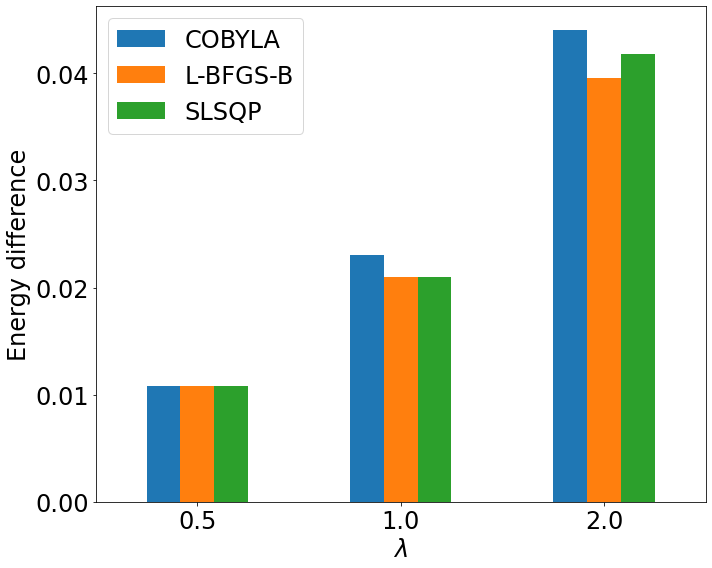

In [31]:
fig, ax = plt.subplots()
df.plot.bar(y=['COBYLA_HT','L_BFGS_B_HT','SLSQP_HT'],label=False,ax=ax)
ax.tick_params(axis="x", rotation=0)
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel("Energy difference")
ax.legend(["COBYLA","L-BFGS-B","SLSQP"])
plt.savefig("../figures/bosBMN_L4_couplings_e-diff_ry_depth3_reps10_max10000.pdf")
plt.savefig("../figures/bosBMN_L4_couplings_e-diff_ry_depth3_reps10_max10000.png")
plt.savefig("../figures/bosBMN_L4_couplings_e-diff_ry_depth3_reps10_max10000.svg")

# Running times on Hokusai

## Bosonic model

This is using 4 threads

In [9]:
df = pd.read_csv("times_bos.csv", dtype=float)
df.head()

,seconds
0,6477.216976
1,93.351793
2,1243.918312
3,2772.095107
4,2872.302981


In [ ]:
df.plot.hist()

In [11]:
df['minutes'] = df['seconds']/60.
df['hours'] = df['seconds']/3600.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seconds,124.0,2787.822453,2220.401625,45.074062,425.693896,2659.566354,4772.048595,6705.966096
minutes,124.0,46.463708,37.006694,0.751234,7.094898,44.326106,79.534143,111.766102
hours,124.0,0.774395,0.616778,0.012521,0.118248,0.738768,1.325569,1.862768


<AxesSubplot:ylabel='Frequency'>

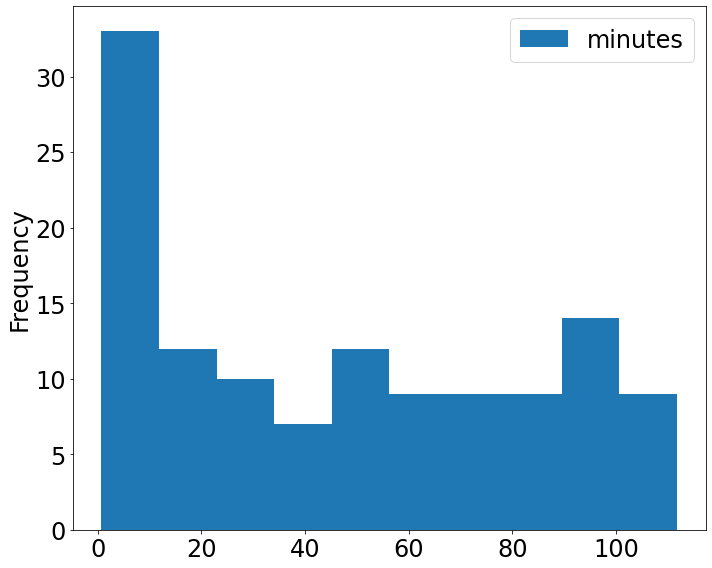

In [13]:
df.plot.hist(y='minutes')